# Waze User Churn - 01. Data Cleaning & Exploratory Data Analysis

**Notebook goal**  
- Nomalize and clean Waze user churn data
- Explore the distribution of key variables and their relationship with `churn`

**Business Problem**

Wave wants to understand the factors that lead to user churn, to design more effective retention campaigns.

**Some main questions:**
1. The features of app usage (drives, sessions, days active, ...) differ between churn and non-churn groups?
2. Do device types or user segments (professional vs casual) have different churn rates?    
3. What insights from EDA and statistical tests can suggest retention strategies? 

## 1. Import Libraries and Load Data

In [156]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for statistical testing
from scipy import stats

In [157]:
# load the raw dataset
pd.set_option("display.max_columns", None)
df = pd.read_csv("../data/raw/waze_dataset.csv")

## 2. Initial Data Understanding

Let's get a first look at the data's structure, types, and summary statistics.

### 2.1. Shape & Data Dictionary

In [158]:
# display first 5 rows
print("=== First 5 Rows of the Dataset ===")
df.head()

=== First 5 Rows of the Dataset ===


,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [159]:
# get the dataset info
print("\n=== Dataset Information ===")
print(f"Dataset shape: {df.shape}")
df.info()


=== Dataset Information ===
Dataset shape: (14999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64

#### **Column definitions**

| Column | Meaning |
| :--- | :--- |
| **`ID`** | The unique identifier for each user. |
| **`label`** | The classification or status of the user (e.g., 'churned' or 'retained'). |
| **`sessions`** | The number of times the user opened or used the application in the **last month**. |
| **`drives`** | The number of trips or drives recorded by the application in the **last month**. |
| **`total_sessions`** | The **cumulative total** number of times the user has opened or used the application since onboarding. |
| **`n_days_after_onboarding`** | The number of days since the user registered for the application (often used to measure **tenure**). |
| **`total_navigations_fav1`** | The total number of times the user navigated to their primary saved favorite location (Favorite 1). |
| **`total_navigations_fav2`** | The total number of times the user navigated to their secondary saved favorite location (Favorite 2). |
| **`driven_km_drives`** | The total distance (in kilometers) driven and recorded via the application in the **last month**. |
| **`duration_minutes_drives`** | The total driving time (in minutes) recorded via the application in the **last month**. |
| **`activity_days`** | The number of distinct days in the **last month** the user opened or interacted with the application. |
| **`driving_days`** | The number of distinct days in the **last month** the user completed at least one recorded drive. |
| **`device`** | The type of mobile device the user is using (e.g., iPhone, Android). |

### 2.2. Summary Statistics

In [160]:
# get summary statistics for numerical columns
print("\n=== Summary Statistics ===")
df.describe()


=== Summary Statistics ===


,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


#### **Initial Analysis:**

- **Size of Dataset:** The dataset contains 14,999 rows and 13 columns.
- **Data Types:** The dataset includes a mix of integer, float, and object data types. Specificially, the `label` and `device` columns are of `object` type; `total_sessions`, `driven_km_drives`, and `duration_minutes_drives` are of type `float64`; the rest of the variables are of type `int64`.
- **Missing Data:** Only `label` column has 700 missing values, which needs to be processed further.
- **Statistical Summary:** `sessions`, `drives`, `total_sessions`, `total_navigations_fav1`, `total_navigations_fav2`, `driven_km_drives`, and `duration_minutes_drives` all have `max` values that are significantly higher than their 75th percentile, indicating strong right-skewness and the presence of outliers. 

## 3. Data Cleaning

### 3.1. Drop Unnecessary Columns

The `ID` column is a unique identifier and provides no predictive and analytical value. Therefore, I will drop it.

In [161]:
df = df.drop(columns=['ID'], errors='ignore')
print("'ID' column dropped.")

'ID' column dropped.


### 3.2. Handle Missing Data

Based on the initial inspection, I will proceed with handling the missing data in the `label` column. Before determining the imputation method, I will first analyze its missing data pattern.

I will achieve this by splitting the dataset into two groups: nulls (missing values) and non-nulls (observed values) for the `label` column.

Then, I will compare the descriptive statistics of the other features between these two groups to understand the mechanism of missingness.

In [162]:
# isolate the two groups: nulls and non-nulls in the 'label' column
nulls_df = df[df['label'].isnull()]
non_nulls_df = df[df['label'].notnull()]

# compare descriptive statistics between the two groups
print("\n=== Descriptive Statistics for rows in nulls_df ===")
display(nulls_df.describe())
print("\n=== Descriptive Statistics for rows in non_nulls_df ===")
display(non_nulls_df.describe())



=== Descriptive Statistics for rows in nulls_df ===


,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000



=== Descriptive Statistics for rows in non_nulls_df ===


,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [163]:
# compare the categorical feature (device) between the two groups
print("\n=== Device distribution in nulls_df ===")
display(nulls_df['device'].value_counts(normalize=True))
print("\n=== Device distribution in non_nulls_df ===")
display(non_nulls_df['device'].value_counts(normalize=True))


=== Device distribution in nulls_df ===


device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64


=== Device distribution in non_nulls_df ===


device
iPhone     0.64515
Android    0.35485
Name: proportion, dtype: float64

**Missing Data Analysis:**
- The summary statistics (mean, median, std) for all numerical columns are almost **identical** between the `nulls_df` and `non_nulls_df`.
- The `device` distribution (64% iPhone, 36% Android) is also **consistent** between both groups.

**Conclusion:** This strongly suggests the data is **Missing Completely At Random (MCAR)**. Since the missing data is MCAR and constitutes a small portion of the dataset (< 5%), the safest and simplest approach is to **drop these 700 rows.**

In [164]:
# drop rows with missing 'label' values
df.dropna(subset=['label'], inplace=True)
print(f"\nRows after dropping missing 'label' values: {len(df)}")


Rows after dropping missing 'label' values: 14299


### 3.3. Handle Outliers

The `describe()` function, executed during the initial inspection phase, revealed some extreme values in the numerical columns, which indicates the presence of significant outliers. For distance-based models like Logistic Regression and SVM, these outliers can negatively impact model performance.

Although tree-based models such as Random Forest and Gradient Boosting are less sensitive to outliers, these extreme values can still affect the final model performance and skew our overall analysis.

I will first examine the spread of these important features using box plots.

In [165]:
# get all numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

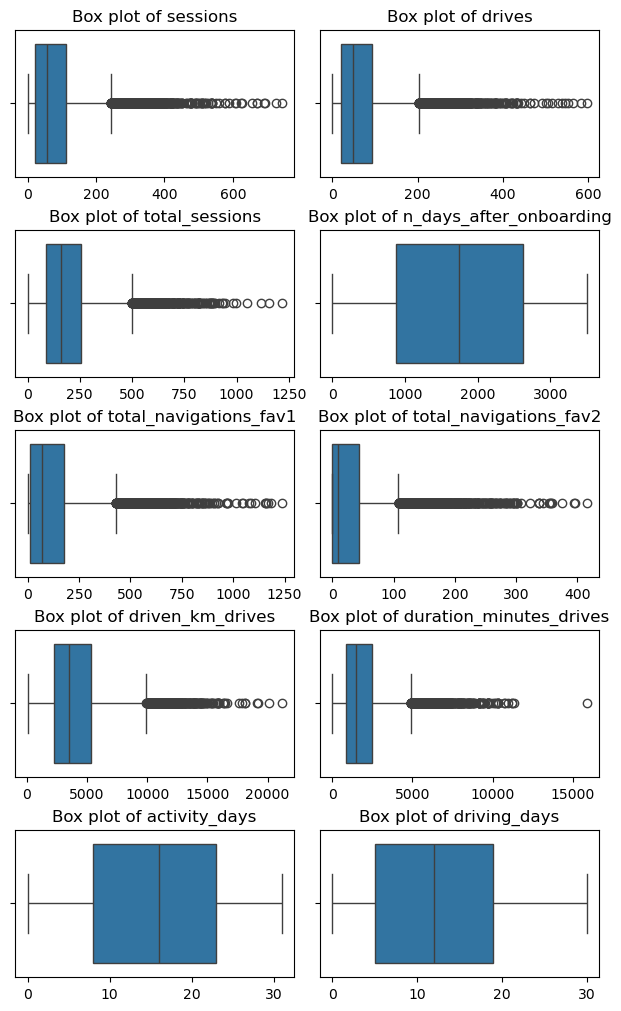

In [166]:
# box plots for numerical columns to visualize outliers
n_cols = 2
n_plots = len(numerical_cols)
n_rows = int(np.ceil(n_plots / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, max(2, n_rows * 2)), constrained_layout=True)
axes_flat = axes.flatten() if hasattr(axes, "flatten") else [axes]

for ax, col in zip(axes_flat, numerical_cols):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Box plot of {col}')
    ax.set_xlabel('')

# hide any unused subplots
for ax in axes_flat[n_plots:]:
    ax.set_visible(False)

#### **Outlier Analysis and Capping Strategy**

The box plots for the main usage-related features show that several variables have a long right tail, with a small number of users taking extremely large values compared with the majority. Below is a feature-by-feature summary and the corresponding business rationale for our outlier treatment.

1. `sessions`
  - **Observation:** The distribution of `sessions` is heavily `right-skewed`. Most users have relatively few sessions, while a small group shows very high session counts.
  - **Business interpretation:** Extremely high session counts may represent a small group of “power users” or atypical usage behaviours (e.g., repeated app opens, background activity, logging artefacts).
- **Why capping is needed:** For modeling churn, we mainly need to know that these users are *much more active than typical*, not the exact extreme count. Keeping raw, very large values overly stretches the scale and can make the model focus too much on a tiny fraction of users.
<!-- - **Decision:** Cap values above the 95th percentile at the 95th percentile. -->

2. `drives`
  - **Observation:** `drives` exhibits a similar right-skewed pattern: most users have a modest number of drives, with a long tail of very high values.
  - **Business interpretation:** Very large `drives` counts could indicate professional drivers or highly engaged users, but can also include measurement anomalies or rare trips.
  - **Why capping is needed:** From a churn-prediction perspective, we care that these users are “heavy drivers” rather than distinguishing between, for example, 300 vs. 600 drives. Capping keeps the feature informative while preventing a few extreme values from dominating the scale.
  <!-- - **Decision:** Cap values above the 95th percentile at the 95th percentile. -->

3. `total_sessions`
  - **Observation:** `total_sessions` also shows a long right tail, with many users clustered at relatively low values and a small number far out on the right.
  - **Business interpretation:** This feature captures long-term engagement. Extremely high totals can reflect long-tenure, power usage, or logging behaviour that is not representative of a typical user.
  - **Why capping is needed:** Similar to `sessions`, we want the model to recognize “highly engaged” users without over-weighting a handful of extreme totals that may not generalize well.
  <!-- - **Decision:** Cap values above the 95th percentile at the 95th percentile. -->

4. `driven_km_drives`
  - **Observation:** `driven_km_drives` has a pronounced right tail, with a few users showing very large total distance driven compared with most of the population.
  - **Business interpretation:** These may be users who frequently take long trips (e.g., long-distance or professional drivers) or edge cases where a few very long journeys dominate the total.
  - **Why capping is needed:**vFor churn modeling, differentiating between low / medium / high distance usage is more important than preserving very rare extremes (e.g., 10,000+ km). Extreme values can distort the scale and reduce model stability.
  <!-- - **Decision:** Cap values above the 95th percentile at the 95th percentile. -->

5. `duration_minutes_drives`
  - **Observation:** The total driving duration in minutes is also highly right-skewed, with a small group of users accumulating very large total driving times.
  - **Business interpretation:** Similar to total distance, these users likely represent an extreme usage segment. However, the precise magnitude of the largest values is less important than the fact that they are “very high”.
  - **Why capping is needed:** Without capping, a few extreme values can dominate the feature scale and make the model overly sensitive to rare usage patterns. Capping preserves the signal “high total duration” while reducing the influence of outliers.
  <!-- - **Decision:** Cap values above the 95th percentile at the 95th percentile. -->

6. `total_navigations_fav1` and `total_navigations_fav2`

  - **Observation:**  Both `total_navigations_fav1` and `total_navigations_fav2` show right-skewed distributions, with some users having a large number of navigations to their favourite destinations.
  - **Business interpretation:** High values here are strong and intentional signals of **loyalty and habit**: users repeatedly navigate to their favourite locations (e.g., home, work, or other frequent destinations). These are not obvious “errors” but meaningful behaviours.
  - **Why capping is *not* applied:** In this case, the extreme values themselves carry useful information: **users who navigate very frequently to favourite places are likely highly engaged and possibly less prone to churn**. Capping would reduce the contrast between “moderately loyal” and “very loyal” users, weakening this signal.
  <!-- - **Decision:** Do **not** cap `total_navigations_fav1` and `total_navigations_fav2`; keep their full range as a deliberate measure of depth of engagement. -->

7. `n_days_after_onboarding`, `activity_days`, and `driving_days`

  - **Observation:** These variables describe time-based activity within a limited window (e.g., number of days since onboarding, number of days with any activity or driving). Their box plots show a relatively compact range compared with the usage-volume features above.
  - **Business interpretation:**  Values here are naturally bounded by the observation window (e.g., at most 30 days), so even the largest values are still realistic and interpretable. They are not “outliers” in the same sense as extreme counts of sessions or kilometres.
  - **Why capping is not strictly necessary:** Because these features are already constrained and their maximum values fall within the expected business range, capping would add little value and might unnecessarily distort the natural distribution of recency and frequency.
<!-- - **Decision:**  
  Leave `n_days_after_onboarding`, `activity_days`, and `driving_days` uncapped. -->

To implement the above strategy, the following numeric features are capped at the 95th percentile:

- `sessions`  
- `drives`  
- `total_sessions`  
- `driven_km_drives`  
- `duration_minutes_drives`  

while `total_navigations_fav1`, `total_navigations_fav2`, `n_days_after_onboarding`, `activity_days`, and `driving_days` are left unchanged.


In [167]:
def outlier_imputer(column_name, percentile):
    """
    Impute outliers for a specific column. 
    Values greater than the specified percentile are capped at that percentile.
    """
    # calculate threshold
    threshold = df[column_name].quantile(percentile)
    print(f"Column: '{column_name}' | 95th percentile threshold: {threshold:.2f}")
    # impute values
    df.loc[df[column_name] > threshold, column_name] = threshold
    print(f"New Max Value: {df[column_name].max():.2f}\n")

# 
columns_to_impute = ['sessions', 'drives', 'total_sessions', 'driven_km_drives', 
                     'duration_minutes_drives']

# Apply the function
for col in columns_to_impute:
    outlier_imputer(col, 0.95)

Column: 'sessions' | 95th percentile threshold: 243.00
New Max Value: 243.00

Column: 'drives' | 95th percentile threshold: 200.00
New Max Value: 200.00

Column: 'total_sessions' | 95th percentile threshold: 455.44
New Max Value: 455.44

Column: 'driven_km_drives' | 95th percentile threshold: 8898.72
New Max Value: 8898.72

Column: 'duration_minutes_drives' | 95th percentile threshold: 4668.18
New Max Value: 4668.18



In [168]:
# verify the changes with describe()
print("Descriptive stats after outlier imputation:")
df.describe()

Descriptive stats after outlier imputation:


,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,121.747395,29.638296,3944.558631,1792.911210,15.544653,12.182530
std,67.243178,55.127927,118.720520,1008.663834,147.713428,45.350890,2218.358258,1224.329759,9.016088,7.833835
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,243.000000,200.000000,455.439492,3500.000000,1236.000000,415.000000,8898.716275,4668.180092,31.000000,30.000000


### 3.4. Save Cleaned Data
After completing the data cleaning, I will save the cleaned dataset to a new CSV file for future analysis and modeling.

In [169]:
output_path = '../data/processed/waze_clean.csv'
# save the cleaned dataframe
df.to_csv(output_path, index=False)

print(f"Cleaned data saved to: {output_path}")

Cleaned data saved to: ../data/processed/waze_clean.csv


## 4. Exploratory Data Analysis (EDA)

Now that the data is clean, I will create visualizations to understand variable distributions and their relationships with the target variable, `label`.

In [170]:
# load the cleaned data set
df_cleaned = pd.read_csv(output_path)

### 4.1. Univariate Analysis (Variable Distributions)
#### 4.1.1. Numerical Feature

Next, to perform a numerical analysis, I will use histograms to visualize the distributions of the numerical features following outlier imputation.

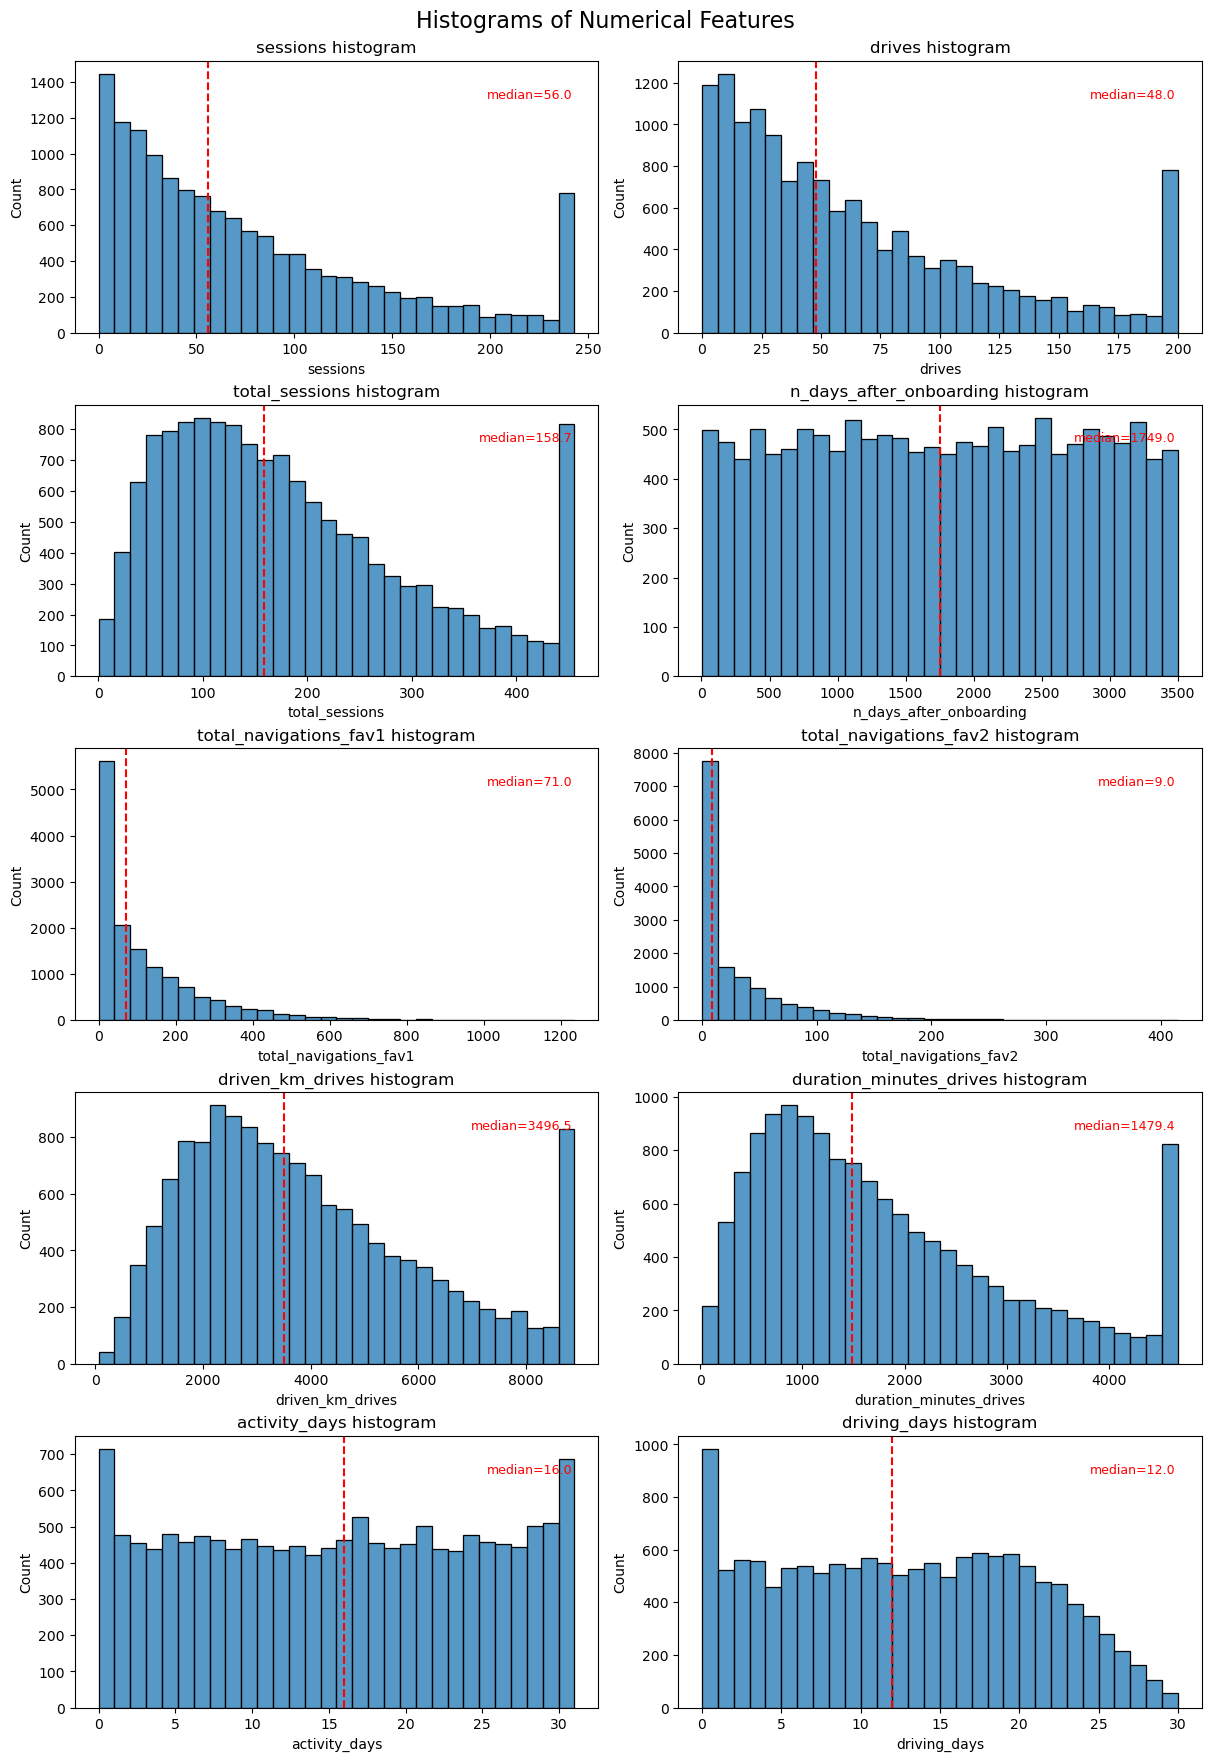

In [171]:
# plot all numerical feature histograms
n_cols = 2
n_plots = len(numerical_cols)
n_rows = int(np.ceil(n_plots / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 3.5), constrained_layout=True)
axes_flat = axes.flatten()

for ax, col in zip(axes_flat, numerical_cols):
    sns.histplot(data=df_cleaned, x=col, ax=ax, bins=30, kde=False)
    med = df_cleaned[col].median()
    ax.axvline(med, color='red', linestyle='--')
    ax.text(0.95, 0.9, f'median={med:.1f}', transform=ax.transAxes,
            ha='right', va='top', color='red', fontsize=9)
    ax.set_title(f'{col} histogram')

# hide any unused axes
for ax in axes_flat[n_plots:]:
    ax.set_visible(False)

plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

**Analysis of numerical feature distributions:**

After capping outliers at the 95th percentile, the histograms reveal three distinct patterns in the data:

- **Right-Skewed (Skewed Positive):**
    * `sessions`, `drives`, and `total_sessions` are all moderately right-skewed. This indicates that most users have a low-to-moderate number of sessions, while a smaller group of "power users" have a very high number.
    * This skew is **extremely** pronounced for `total_navigations_fav1` and `total_navigations_fav2`. The vast majority of users have values at or near zero, suggesting these features are used infrequently by most.

- **Symmetric (Normal-like):**
    * `driven_km_drives` and `duration_minutes_drives` both display a relatively symmetric, "bell-shaped" curve. This is a healthy distribution, showing that most users cluster around the median total distance (3496.5 km) and duration (1479.4 min).

- **Uniform (Evenly Spread):**
    * `n_days_after_onboarding`, `activity_days`, and `driving_days` all show a surprisingly **uniform distribution**. This is a significant finding.
    * It means our dataset is **well-balanced** in terms of user tenure (not just new users) and activity levels (a good mix of inactive, casual, and active users). This balance is ideal for building a predictive model.

#### 4.1.2. Categorical Feature

These features are categorical type, so I will use a pie chart to visualize the distribution of its values.

**`device`**

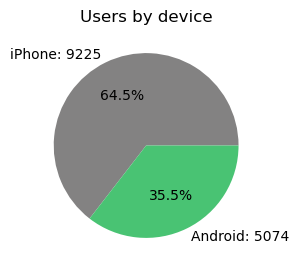

In [172]:
# pie chart
fig = plt.figure(figsize=(3,3))
data=df_cleaned['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%',
        colors=["#838282","#49c373"]
        )
plt.title('Users by device');

As we can see, there are nearly twice as many iPhone users (64.5%) compared to Android users (35.5%) in this dataset.

**`label`**

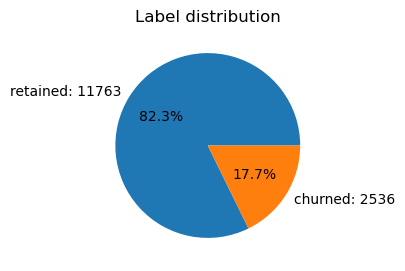

In [189]:
# pie chart
fig = plt.figure(figsize=(3,3))
data=df_cleaned['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Label distribution');

The pie chart of the target variable shows a significant **class imbalance**.
* **Retained:** $82.3\%$ (11763 users)
* **Churned:** $17.7\%$ (2536 users)

The `retained` class is the clear majority. This imbalance is critical, as it will require specific handling during modeling (such as **resampling** or using **class weights**). Consequently, model evaluation should rely on metrics robust to imbalance, like **Precision, Recall, F1-score, and AUC**, rather than just accuracy.

### 4.2. Bivariate Analysis  (with target variable)
#### 4.2.1. Numeric vs Churn

Next, to gain a clearer understanding of the relationship between these variables and churn, I will compare the medians of each numeric variable for churned versus retained users.

The reason for calculating the median (and not the mean) is that the median is robust to outliers and will not unduly affect the portrayal of a typical user.

In [174]:
# calculate median values of all columns for churned and retained users
df_cleaned.groupby('label').median(numeric_only=True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,
churned,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


The median comparison reveals a striking contrast between the two groups:
- **Retained users** demonstrated much higher engagement in terms of **frequency**, using the app on **more than double the number of days** as churned users.
- Conversely, **churned users** showed higher **intensity**. They logged slightly **more drives (~3 more)** and their trips were substantially **longer**, covering a median of ~200 additional kilometers and lasting ~2.5 more hours. This suggests that **churned users may be 'infrequent but heavy' drivers**.

#### **Retention by kilometers driven per driving day**

Our previous analysis (comparing all medians) suggested an **infrequent but heavy** driver profile for churned users: they log more drives but on significantly fewer days.

This leads to a key hypothesis: **while their *total* monthly kilometers might be comparable or even lower, their *average distance per day of driving* is likely much higher.**

To test this, I will engineer a new feature, `km_per_driving_day`. This column will normalize the total distance driven by the number of days the user actually drove (`total_km / driving_days`).

In [175]:
# add a column to df called `km_per_driving_day`
df_cleaned['km_per_driving_day'] = df_cleaned['driven_km_drives'] / df_cleaned['driving_days']

# group by `label`, calculate the median, and isolate for km per driving day
median_km_per_driving_day = df_cleaned.groupby('label').median(numeric_only=True)[['km_per_driving_day']]
median_km_per_driving_day

,km_per_driving_day
label,
churned,684.516637
retained,289.549333


Call `describe()` to get a full statistical summary of the new feature.

In [177]:
# convert infinite values to NaN (in case driving_days is 0)
df_cleaned.loc[df_cleaned['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# describe the new column
df_cleaned['km_per_driving_day'].describe()

count    14299.000000
mean       567.010426
std        970.136935
min          0.000000
25%        136.168003
50%        273.301012
75%        543.473676
max       8898.716275
Name: km_per_driving_day, dtype: float64

**Analysis**:

- **Churned** users have a median of **684.5 km** driven per day they were active. This is significantly higher—**approximately 2.4 times**—than the median of **289.5 km** for **retained** users. This reinforces the "infrequent but heavy" driver profile.

- The `describe()` method revealed a max value of **8898.7 km**. This is physically impossible. Even if a user drove 100 km/h for 12 hours straight, they would only cover 1,200 km.

To get a clear, undistorted histogram of the distribution, I will **filter out rows where `km_per_driving_day` is greater than 1,200 km** for visualization purposes.

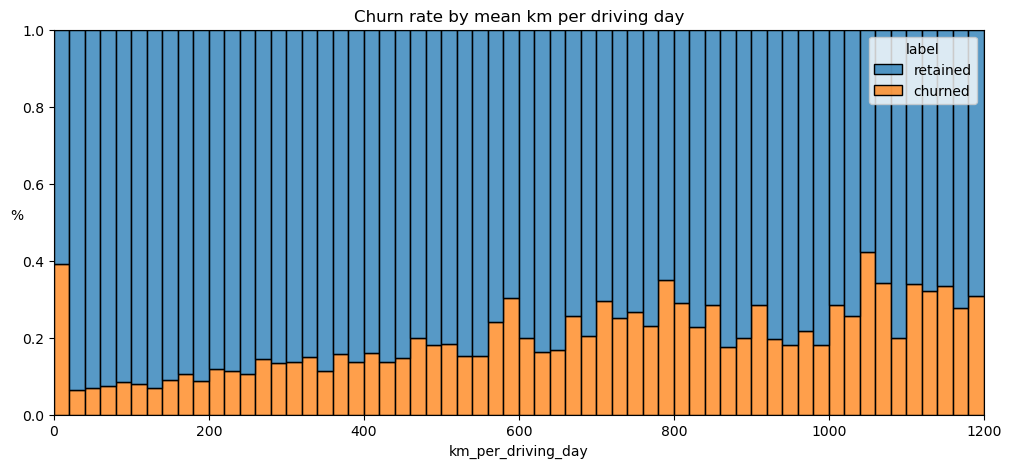

In [178]:
plt.figure(figsize=(12,5))
sns.histplot(data=df_cleaned,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

**Key Insight:** 
- The chart shows a clear trend: **the higher the average daily driving distance, the higher the proportion of churned users.** This "heavy-duty" user segment, characterized by long-distance driving, has a noticeably higher churn rate. It's worth investigating why these users are more prone to leaving.

#### **Retention per number of driving days**

Next, to investigate further about two user groups' behavior, I will plot the retention rate based on the number of driving days in the last month.

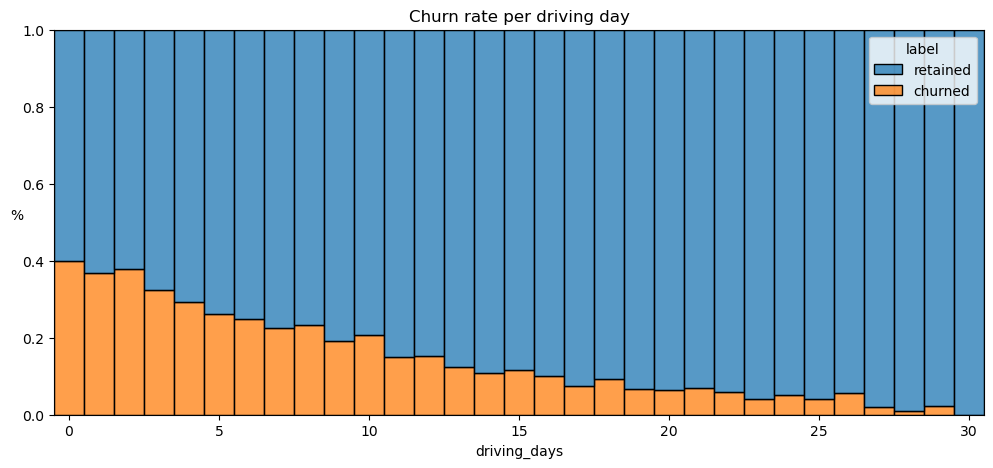

In [179]:
# histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df_cleaned,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

**Key Insight:** 
- The chart shows a clear inverse relationship: **the more active a user is, the less likely they are to churn**.
- This pattern is logical. High churn among active users would be alarming, as it would signal significant product dissatisfaction. Conversely, high churn among inactive users doesn't necessarily indicate a product failure. It more likely suggests that the user's need for the app has diminished, perhaps due to external lifestyle changes (e.g., moving, changing jobs, or switching to public transportation).



#### **Proportion of sessions that occurred in the last month vs all-time sessions**

Next, I will plot the distribution of the proportion of sessions that occurred in the last month. This feature is crucial for understanding user context. A user's activity in the last month (`sessions`) must be compared to their total, all-time activity (`total_sessions`). This helps us differentiate two very different user profiles:

1.  **New Users:** Users who just signed up. Their `sessions` and `total_sessions` will be very similar, resulting in a **high percentage (near 100%)**. This group is typically at a high risk of churning as they are still evaluating the app.
2.  **Long-Term Users:** Established users who have been on the platform for a long time. Their last month's activity will be a **low percentage** of their total lifetime activity.

**Hypothesis:** We expect to see a much higher churn rate among users with a high `percent_sessions_in_last_month`, as these are likely new users who failed to activate or find value.

In [180]:
# create the 'percent_sessions_in_last_month' column
df_cleaned['percent_sessions_in_last_month'] = df_cleaned['sessions'] / df_cleaned['total_sessions']

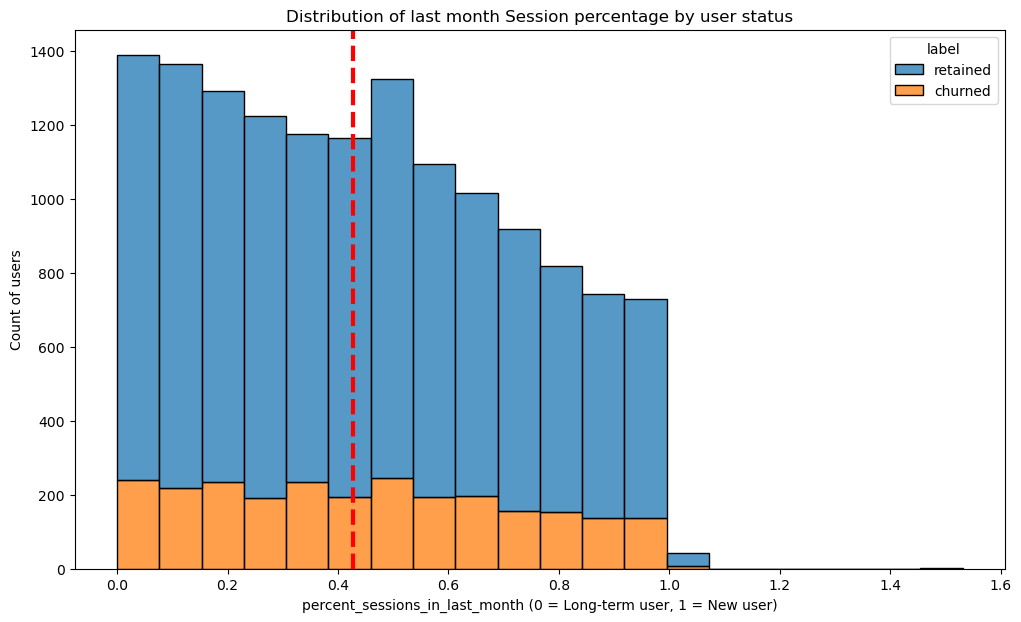

In [182]:
# plot histogram
# add medians
plt.figure(figsize=(12, 7))
sns.histplot(data=df_cleaned,
             x='percent_sessions_in_last_month',
             hue='label',
             multiple='stack',
             bins=20) 
plt.axvline(df_cleaned['percent_sessions_in_last_month'].median(), color='red', linestyle='--', linewidth=3)
plt.title('Distribution of last month Session percentage by user status')
plt.xlabel(f'percent_sessions_in_last_month (0 = Long-term user, 1 = New user)')
plt.ylabel('Count of users')
plt.show()

**Analysis: User Age vs. Churn Rate**

- This histogram strongly confirms our hypothesis: **user "age" is a critical factor in retention.** The chart clearly shows that **new users are significantly more likely to churn than long-term users.**

* **Long-Term Users:** On the left side of the chart (where `percent_sessions_in_last_month` is low), we can see users whose recent activity is only a small fraction of their total activity. For these established users, the **orange (churned) segment is proportionally very small**. This indicates that users who are "tenured" are very likely to be retained.

* **New Users:** As we move to the right (approaching 1.0), we see users whose *entire* history is in the last month. In these bars, the **orange (churned) segment becomes much larger**, in some cases representing nearly half of the users.

* **The Median Line:** The overall median (red dashed line) at ~0.45 splits the user base. Visually, the proportion of churn is significantly higher for the population to the **right** of this median (newer users) than for the population to the **left** (longer-term users).

**Insight:** Churn is heavily concentrated among new users. This highlights that the **first-time user experience and early activation period are the most critical phases** for preventing churn. Users who get past this initial evaluation period are highly likely to remain on the platform.

#### **User Tenure (n_days_after_onboarding) vs. Churn**

This feature directly measures the "age" or "tenure" of each user. It is the other side of the coin to the `percent_sessions_in_last_month` feature I just analyzed.
  * `percent_sessions_in_last_month`: Was an *indirect proxy* for user age.
  * `n_days_after_onboarding`: Is the *direct measurement* of user age.

**Hypothesis:** We expect a strong negative correlation between tenure and churn. The churn rate should be highest for new users (low days after onboarding) and lowest for long-term, established users (high days).

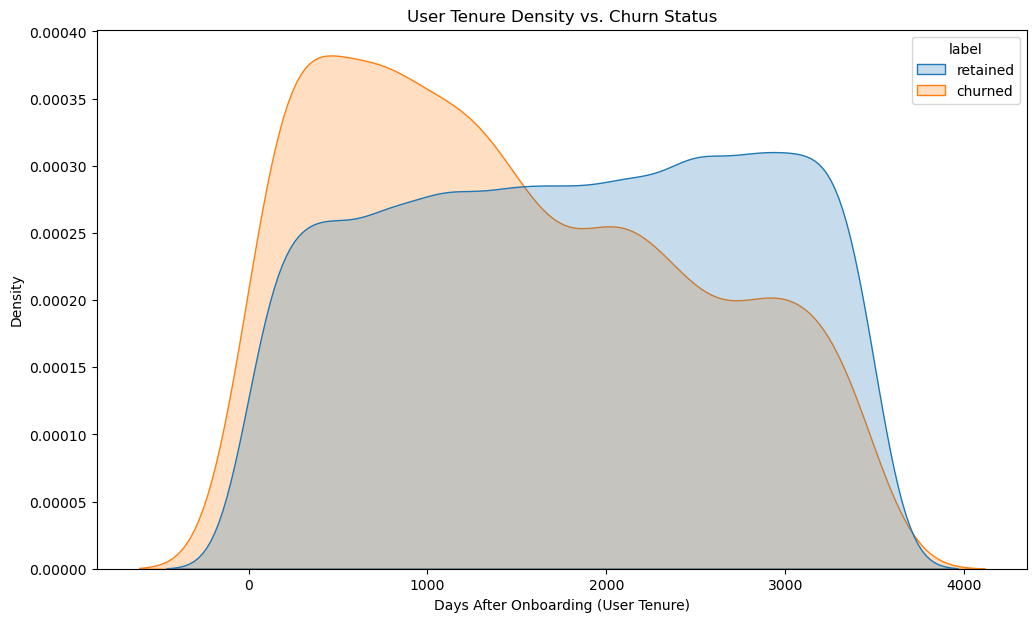

In [183]:
# kde plot
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df_cleaned,
            x='n_days_after_onboarding', 
            hue='label',
            fill=True,
            common_norm=False)

plt.title('User Tenure Density vs. Churn Status')
plt.xlabel('Days After Onboarding (User Tenure)')
plt.ylabel('Density')
plt.show()

**Analysis of User Tenure**

This plot clearly shows that **user tenure** (`n_days_after_onboarding`) is a critical predictor of churn. The two groups have almost opposite distributions:

1.  **`churned` (Orange Curve):**
    * This distribution is heavily **concentrated on the left**.
    * The **peak density** for users who churned is very early in their lifecycle, at approximately 500-750 days.
    * After this peak, the density of churned users drops off sharply. Very few users who have been on the platform for a long time (e.g., > 2500 days) end up churning.

2.  **`retained` (Blue Curve):**
    * This distribution is much **more spread out**, and its "center of mass" is clearly shifted to the **right**.
    * It has a broad, high plateau of users who have been on the platform for **1,000 to 3,000+ days**.
    * This shows that the "healthy" or "loyal" user base consists of users with significant tenure.

**Insights:**

* **Churn Risk is "Front-Loaded":** The highest-risk period for losing a user is within their first ~1,500 days (approx. 4 years). In this early phase, the orange curve is visibly higher, indicating a greater proportion of churn.
* **Tenure Breeds Loyalty:** After this "crossover point" (around 1,500 days), the blue `retained` curve is significantly higher than the orange `churned` curve. This means that once a user stays with the app for that long, they are **highly likely to remain a loyal user**.
* **Confirms Previous Finding:** This plot tells the exact same story as our `percent_sessions_in_last_month` histogram, just from the opposite angle:

    * **New users (high `% sessions`) churn.**
    * **New users (low `days after onboarding`) churn.**

#### 4.2.2. Categorical vs Churn (retention by device)

To understand the relationship between device type and user retention, I will create a count plot showing the breakdown of retained and churned users across both iPhone and Android devices.

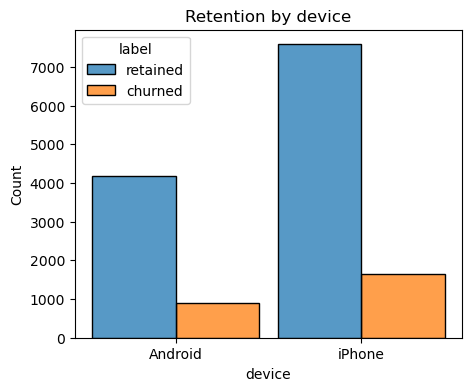

In [184]:
# histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df_cleaned,
             x='device', hue='label', multiple='dodge',shrink=0.9)
plt.title('Retention by device');

As we can see, the proportion of churned users to retained users is consistent between device types, indicating that **`device` type does not significantly influence user retention in this dataset**.

### 4.3. Correlation Between Numerical Features

Now, after I have analyzed individual features and their relationship to churn, I will examine the relationships between all the numerical features at once by using a heatmap.

It is a powerful visualization tool that allows us to check for multicollinearity among features and identify potential predictors for our churn model.

In [185]:
# get all numerical columns
df_numerical = df_cleaned.select_dtypes(include=['int64', 'float64'])
# create the correlation matrix
corr = df_numerical.corr(method='pearson')

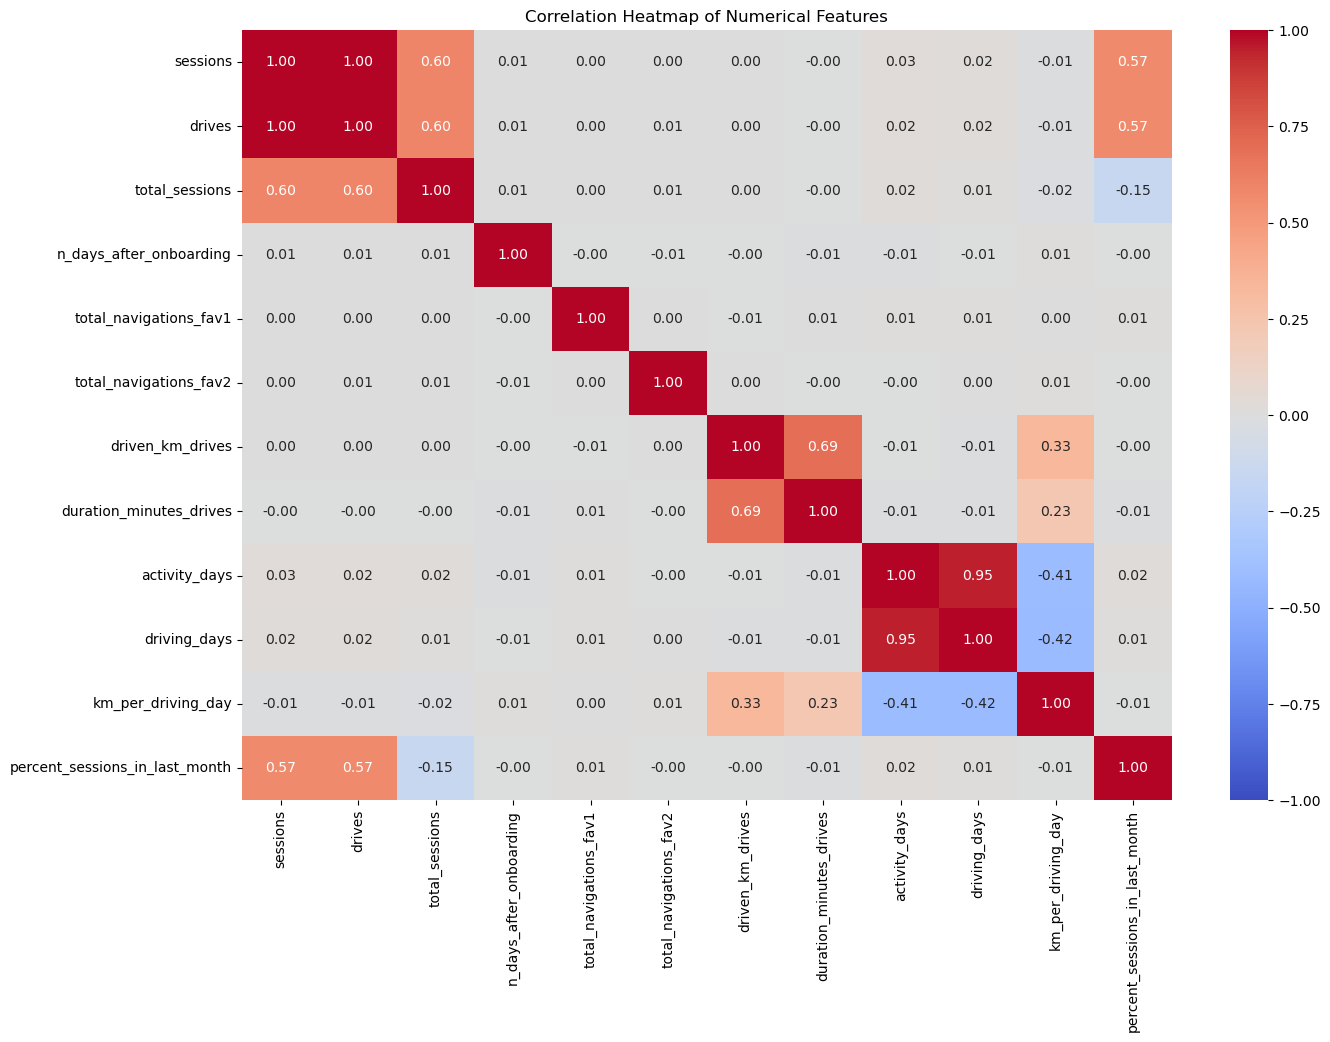

In [186]:
# plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Heatmap Analysis:**
-  **`sessions` and `drives`** are perfectly correlated (1.00). They are redundant.
-  **`activity_days` and `driving_days`** are almost perfectly correlated (0.95). They also measure the same core concept.
- **`duration_minutes_drives` and `driven_km_drives`** have a strong positive correlation (0.69).
-  **`km_per_driving_day`** has a notable negative correlation with `activity_days` (-0.41) and `driving_days` (-0.42). This mathematically confirms our "infrequent long-haul" vs. "frequent commuter" user profiles.
-  **`percent_sessions_in_last_month`** is negatively correlated with `total_sessions` (-0.15), which logically confirms they are inverse measures of user tenure.

**Conclusion:** For linear models (like Logistic Regression), we **must** drop one variable from each of the first three highly correlated pairs to avoid multicollinearity. This is less critical for tree-based models.

#### **Investigating `driving_days` vs. `activity_days`**

The correlation heatmap revealed an **extremely high positive correlation (0.95)** between `driving_days` and `activity_days`. This strongly suggests that the two variables are measuring nearly the same thing and are likely redundant.

To visually confirm this and better understand their relationship, I will now plot both variables on an overlaid histogram. This will allow for a direct, side-by-side comparison of their distributions to see exactly how similar they are.

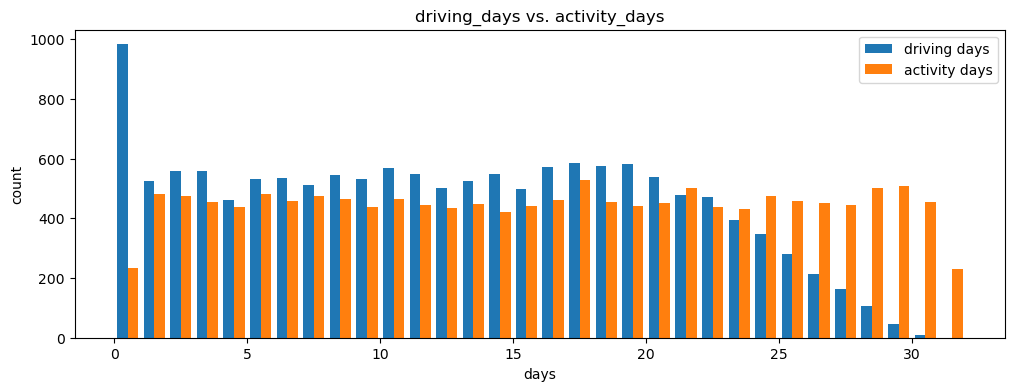

In [188]:
# histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df_cleaned['driving_days'], df_cleaned['activity_days']], bins=range(0,33), label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

**Analysis**:
- At first glance, it's puzzling why there are *more* users with zero `driving_days` than users with zero `activity_days`. However, this likely illustrates typical user behavior.
- The two variables are related but distinct. It suggests that **a portion of user 'activity' is non-driving**; users may open the app simply to check ETAs, plan a future route, or adjust settings without initiating a drive.